In [1]:
# Import the necessary libraries and specify that graphs should be plotted inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import numpy as np

# Setting the maximum number of columns and rows to display in pandas dataframes
pd.set_option("display.max_columns", 1200)
pd.set_option("display.max_rows", 1200)

In [2]:
# Data Loading
df = pd.read_csv(r"C:\Users\cheta\Downloads\Listings.csv", encoding='ISO-8859-1')

C:\Users\cheta\AppData\Local\Temp\ipykernel_7472\4025357460.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\cheta\Downloads\Listings.csv", encoding='ISO-8859-1')


# Data Preprocessing and EDA

In [3]:
# Dimensions of the dataframe
df.shape

(279712, 33)

In [4]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [6]:
df['amenities'][123]

'["Shampoo", "Heating", "Kitchen", "Essentials", "Washer", "Smoke alarm", "Wifi", "Long term stays allowed"]'

In [7]:
null = df.isna().sum()

In [8]:
# Checking the proportion of nulls in the dataset
total_rows = len(df)
null_proportion = null / total_rows

print(null_proportion)

listing_id                     0.000000
name                           0.000618
host_id                        0.000000
host_since                     0.000590
host_location                  0.003003
host_response_time             0.460409
host_response_rate             0.460409
host_acceptance_rate           0.404298
host_is_superhost              0.000590
host_total_listings_count      0.000590
host_has_profile_pic           0.000590
host_identity_verified         0.000590
neighbourhood                  0.000000
district                       0.867678
city                           0.000000
latitude                       0.000000
longitude                      0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bedrooms                       0.105233
amenities                      0.000000
price                          0.000000
minimum_nights                 0.000000
maximum_nights                 0.000000


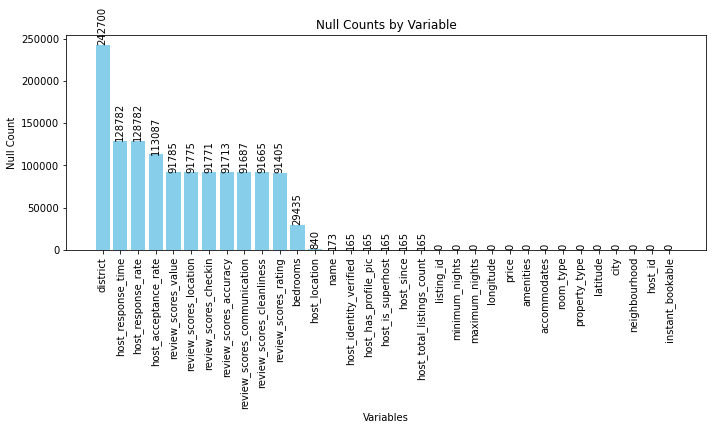

In [9]:
total_rows = len(df)
null_count = df.isnull().sum()

# Sort in descending order
sorted_null_count = null_count.sort_values(ascending=False)

# Plot the bar chart with vertically aligned numbers and x-axis labels
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_null_count.index, sorted_null_count, color='skyblue')

# Add numbers on top of the bars with vertical alignment
for bar, value in zip(bars, sorted_null_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value}', ha='center', va='bottom', rotation=90, color='black')

plt.title('Null Counts by Variable')
plt.xlabel('Variables')
plt.ylabel('Null Count')
plt.xticks(rotation=90, ha='center')  
plt.tight_layout()  
plt.show()


In [10]:
today_date = datetime.today().date()
df['host_since'] = pd.to_datetime(df['host_since'])

In [11]:
df['hosting_since_days'] = (pd.to_datetime(today_date) - df['host_since']).dt.days

<AxesSubplot:>

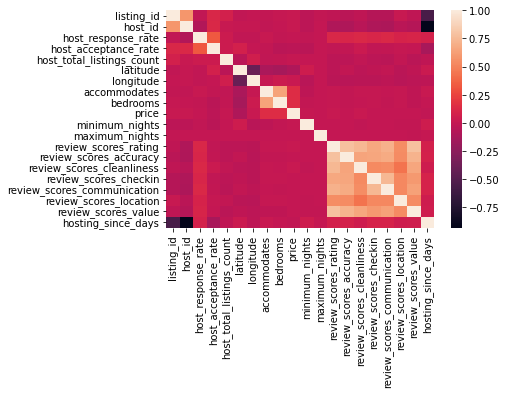

In [12]:
# Creating a heatmap visualization of the correlation matrix
corr = df.corr()
sns.heatmap(corr)

In [13]:
df.corr()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,hosting_since_days
listing_id,1.000000,0.582679,-0.014195,0.109949,0.071972,-0.012022,-0.001949,-0.005969,0.006881,0.011471,-0.034967,-0.005873,-0.026382,-0.047476,-0.025831,-0.065647,-0.067393,0.016243,-0.020410,-0.563673
host_id,0.582679,1.000000,-0.082474,0.122923,0.015198,0.005266,0.008961,-0.014839,-0.001526,0.011795,-0.038348,-0.003148,-0.089288,-0.095226,-0.055538,-0.100904,-0.103973,-0.046701,-0.067068,-0.932251
host_response_rate,-0.014195,-0.082474,1.000000,0.321510,0.037986,-0.015872,-0.018426,0.012068,-0.007806,-0.000697,-0.012630,0.000048,0.112409,0.108358,0.118284,0.106289,0.120641,0.091927,0.099234,0.081131
host_acceptance_rate,0.109949,0.122923,0.321510,1.000000,0.034085,0.073135,-0.003525,-0.008704,-0.045264,-0.039315,-0.045547,0.000307,-0.017294,-0.007801,0.028197,-0.013868,-0.011385,0.005349,0.000529,-0.128635
host_total_listings_count,0.071972,0.015198,0.037986,0.034085,1.000000,-0.042281,0.061737,-0.018868,-0.009910,0.009907,-0.000161,-0.000303,-0.037162,-0.040658,-0.016856,-0.036414,-0.045739,-0.005259,-0.049027,-0.022780
latitude,-0.012022,0.005266,-0.015872,0.073135,-0.042281,1.000000,-0.417783,-0.111880,-0.137463,-0.099278,0.046801,0.001569,-0.034199,-0.007049,-0.035079,-0.023368,-0.011368,-0.043589,-0.022222,0.028851
longitude,-0.001949,0.008961,-0.018426,-0.003525,0.061737,-0.417783,1.000000,0.009465,0.037800,0.019608,-0.056316,-0.001410,-0.048905,-0.052181,-0.045029,-0.043660,-0.033794,-0.052074,-0.039725,-0.033928
accommodates,-0.005969,-0.014839,0.012068,-0.008704,-0.018868,-0.111880,0.009465,1.000000,0.639102,0.146327,-0.033442,0.003241,0.006420,-0.009308,0.007203,0.004743,-0.000910,0.008774,-0.023706,0.020174
bedrooms,0.006881,-0.001526,-0.007806,-0.045264,-0.009910,-0.137463,0.037800,0.639102,1.000000,0.143307,-0.010582,0.000872,0.009007,-0.010811,0.002247,0.005562,-0.004753,0.008412,-0.019745,0.002605
price,0.011471,0.011795,-0.000697,-0.039315,0.009907,-0.099278,0.019608,0.146327,0.143307,1.000000,0.006344,-0.000442,0.015048,-0.000693,0.024328,-0.000243,-0.003262,-0.000609,0.001572,-0.017384


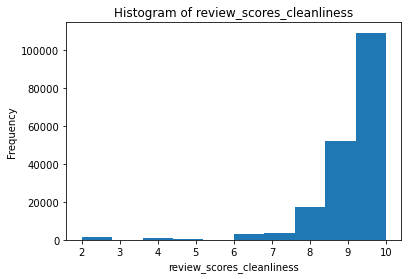

In [14]:
column_name = 'review_scores_cleanliness'

# Create a histogram
plt.hist(df[column_name], bins=10)  
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')
plt.show()

In [15]:
# Imputing the null values with median/mean in the required columns based on the skewness of the  distribution
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace=True)
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)

In [16]:
# Since 2 is the highest occuring value by a long distance, we will impute 2 wherever there are null values
highest_value = df['host_response_time'].value_counts().idxmax()

# Impute the NaN values in the 'host_response_time' column with the highest occurring value
df['host_response_time'].fillna(highest_value, inplace=True)

In [17]:
# On plotting average price by bedrooms, 31 bedrooms Airbnb had unusually high price. Hence, removing it as it is an outlier.
df = df[df['bedrooms'] != 31]
df = df.reset_index(drop=True)

In [18]:
df['bedrooms'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12.,  7.,  9., 11., 50.,
       13., 15., 24., 16., 20., 14., 40., 30., 42., 18., 34., 35., 17.,
       25., 23., 46., 21., 26., 19., 22., 38., 33., 39., 41., 48.])

In [20]:
# Removing rows with NA from host_identity_verified,host_has_profile_pic columns because these have very few NA's
df = df.dropna(subset=['host_identity_verified', 'host_has_profile_pic'])

In [21]:
df.isnull().sum().sort_values(ascending = False)

district                       242551
review_scores_value             91727
review_scores_location          91717
review_scores_checkin           91713
review_scores_accuracy          91655
review_scores_communication     91629
host_location                     675
name                              172
review_scores_cleanliness           0
accommodates                        0
review_scores_rating                0
maximum_nights                      0
minimum_nights                      0
instant_bookable                    0
price                               0
amenities                           0
bedrooms                            0
listing_id                          0
property_type                       0
room_type                           0
longitude                           0
latitude                            0
city                                0
neighbourhood                       0
host_identity_verified              0
host_has_profile_pic                0
host_total_l

In [22]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'hosting_since_days'],
      dtype='object')

In [23]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,hosting_since_days
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",within an hour,0.865939,0.827168,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,4392.0
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",within an hour,0.865939,0.827168,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3665.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",within an hour,0.865939,0.827168,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3421.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",within an hour,0.865939,0.827168,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3647.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",within an hour,0.865939,0.827168,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3285.0


In [24]:
# dropping ID's add names 
df.drop(['listing_id','name','host_id','district','latitude','longitude','host_location','property_type','host_since', 'neighbourhood' ],inplace = True, axis =1)

In [25]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,hosting_since_days
0,within an hour,0.865939,0.827168,f,1.0,t,f,Paris,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,4392.0
1,within an hour,0.865939,0.827168,f,1.0,t,t,Paris,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3665.0
2,within an hour,0.865939,0.827168,f,1.0,t,f,Paris,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3421.0
3,within an hour,0.865939,0.827168,f,1.0,t,t,Paris,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3647.0
4,within an hour,0.865939,0.827168,f,1.0,t,f,Paris,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3285.0


In [26]:
# Deep dive into Amenities column
a=df['amenities']

In [27]:
amenities_list=[]
cnts = []


for amenity_str in a:
    # Remove the square brackets and quotes from the string and then split it by comma
    amenities_lists = amenity_str.strip('[]').replace('"', '').split(', ')
    cnts.append(len(amenities_lists))

In [28]:
df['amenities_count'] = cnts

In [29]:
np.sort(df['amenities_count'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 81, 83, 87, 89],
      dtype=int64)

In [30]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'city', 'room_type',
       'accommodates', 'bedrooms', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'hosting_since_days',
       'amenities_count'],
      dtype='object')

In [31]:
df.drop(['amenities'],inplace = True, axis = 1)

In [32]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,hosting_since_days,amenities_count
0,within an hour,0.865939,0.827168,f,1.0,t,f,Paris,Entire place,2,1.0,53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,4392.0,5
1,within an hour,0.865939,0.827168,f,1.0,t,t,Paris,Entire place,2,1.0,120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3665.0,8
2,within an hour,0.865939,0.827168,f,1.0,t,f,Paris,Entire place,2,1.0,89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3421.0,6
3,within an hour,0.865939,0.827168,f,1.0,t,t,Paris,Entire place,2,1.0,58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3647.0,5
4,within an hour,0.865939,0.827168,f,1.0,t,f,Paris,Entire place,2,1.0,60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3285.0,12


In [33]:
df['bedrooms'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12.,  7.,  9., 11., 50.,
       13., 15., 24., 16., 20., 14., 40., 30., 42., 18., 34., 35., 17.,
       25., 23., 46., 21., 26., 19., 22., 38., 33., 39., 41., 48.])

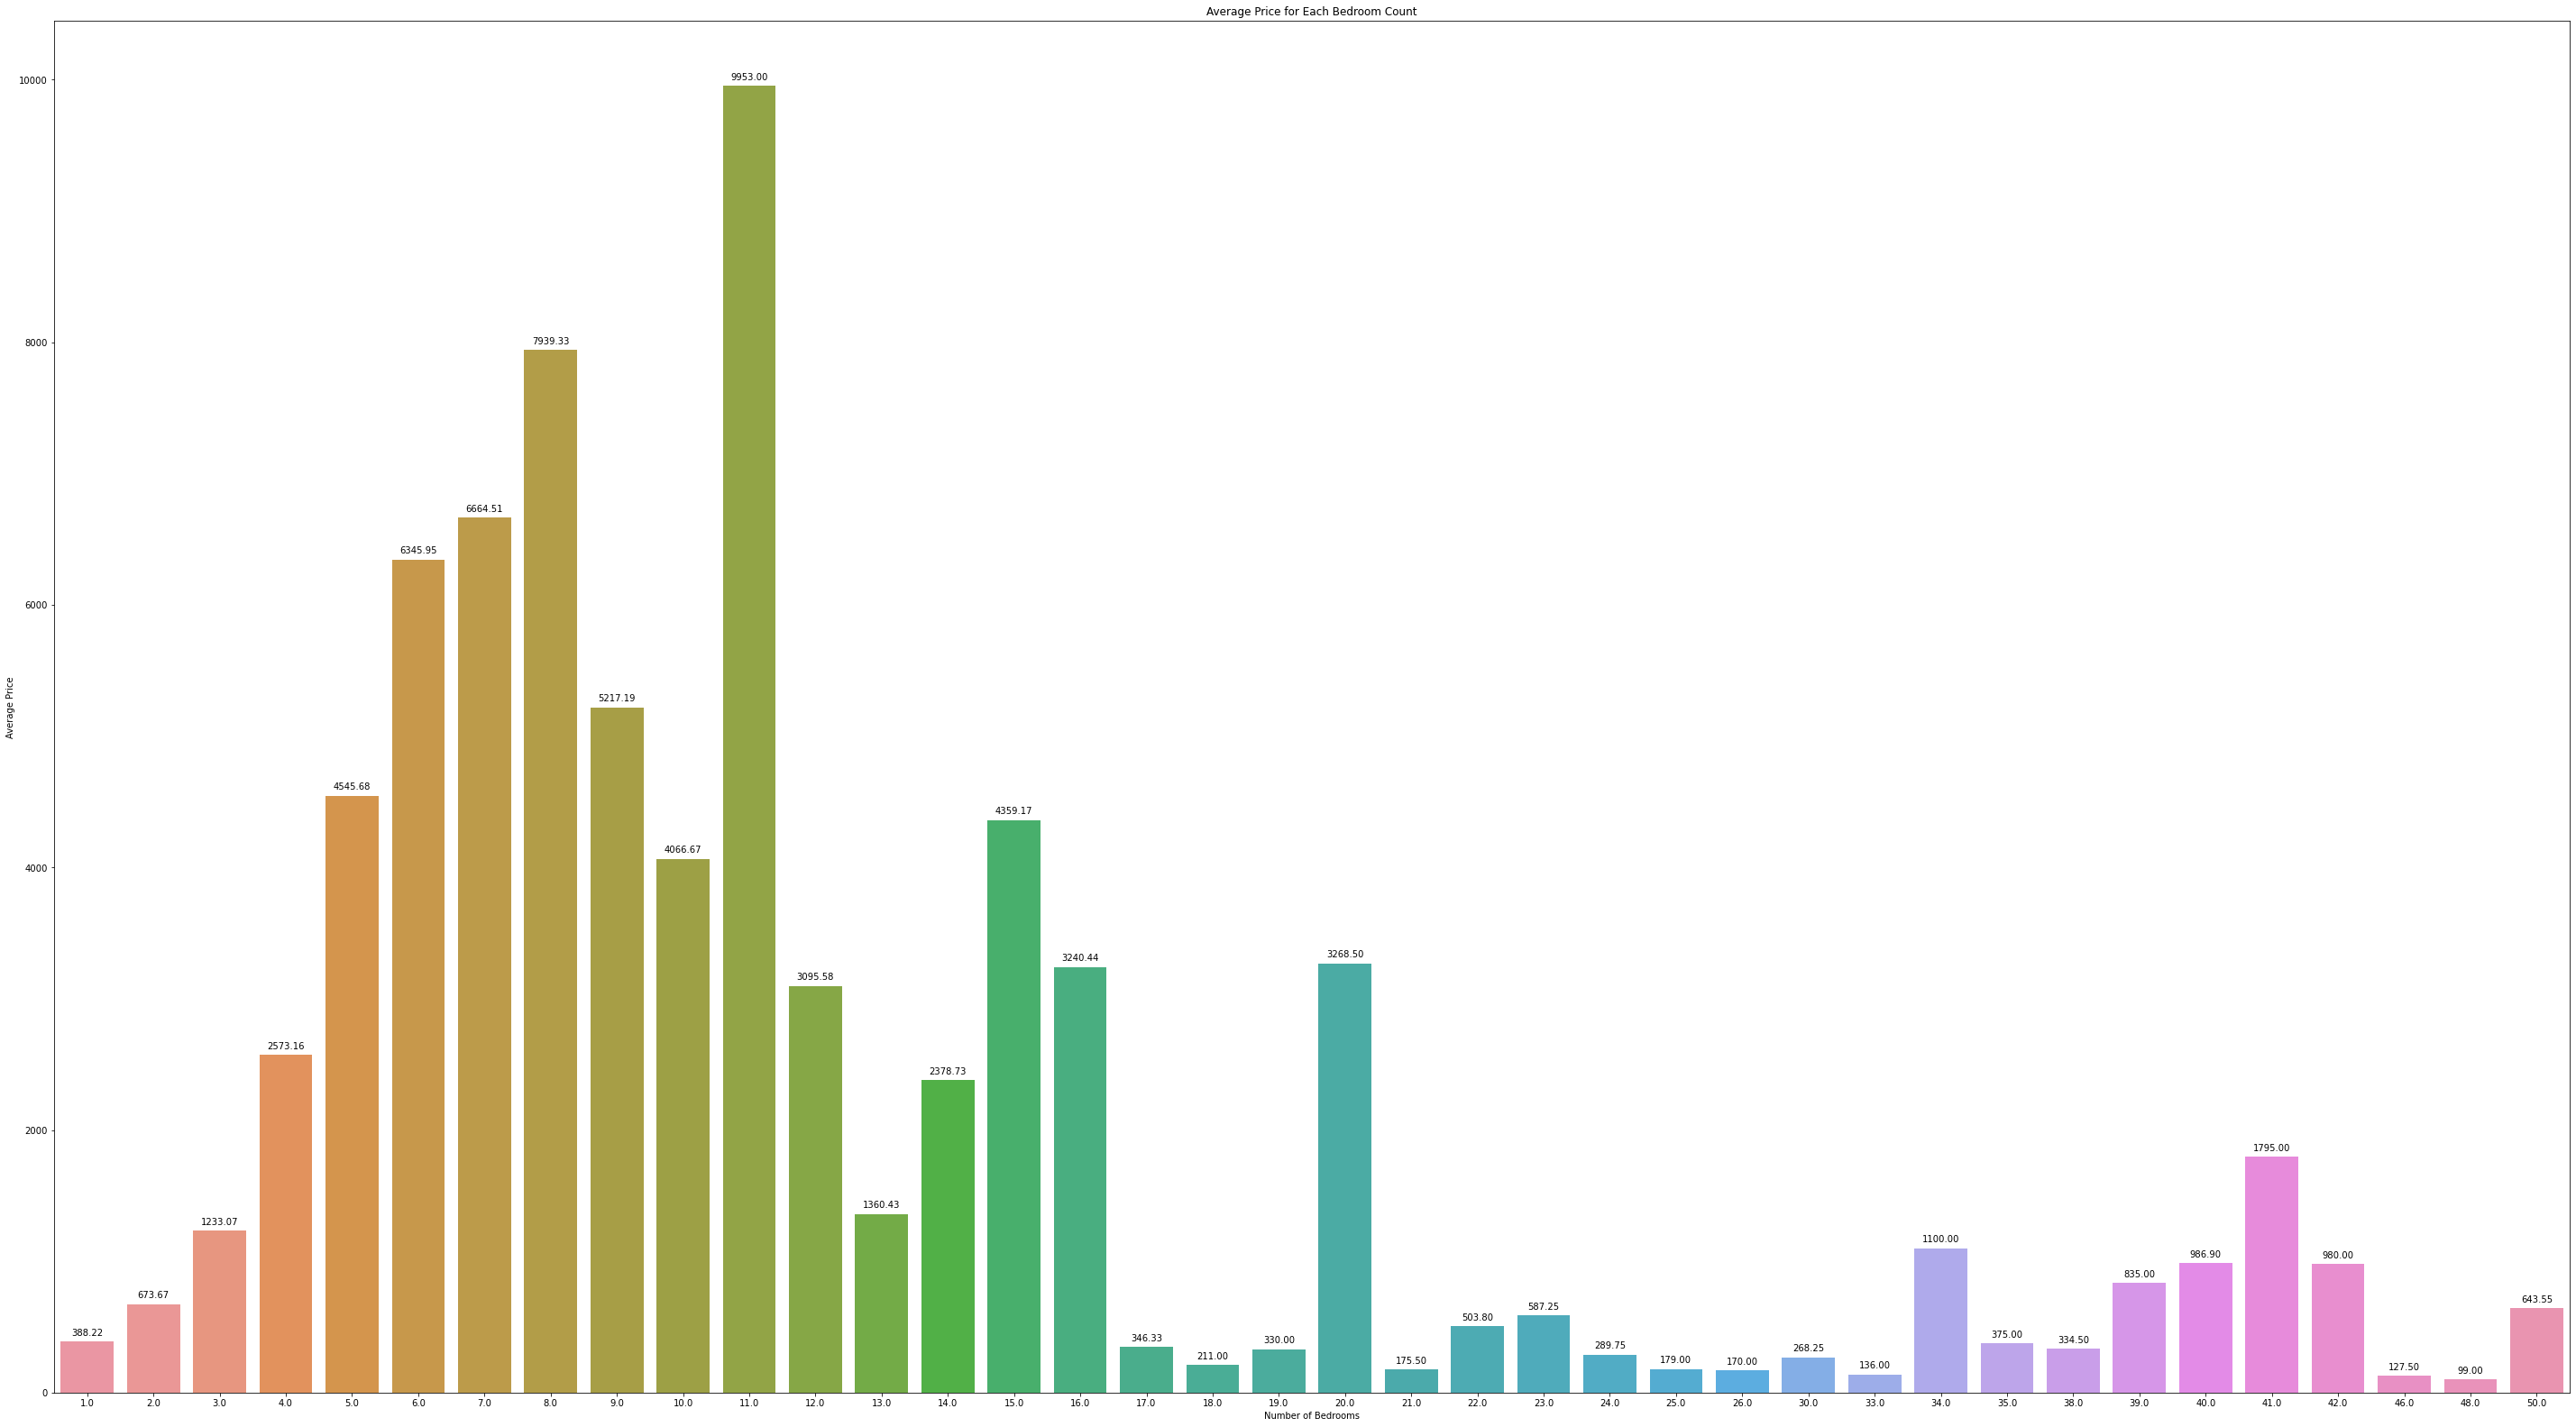

In [34]:
# Average Price for Each Bedroom Type

plt.figure(figsize=(50, 28))
ax = sns.barplot(x='bedrooms', y='price', data=df.groupby('bedrooms').agg({'price': 'mean'}).reset_index())

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Price for Each Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

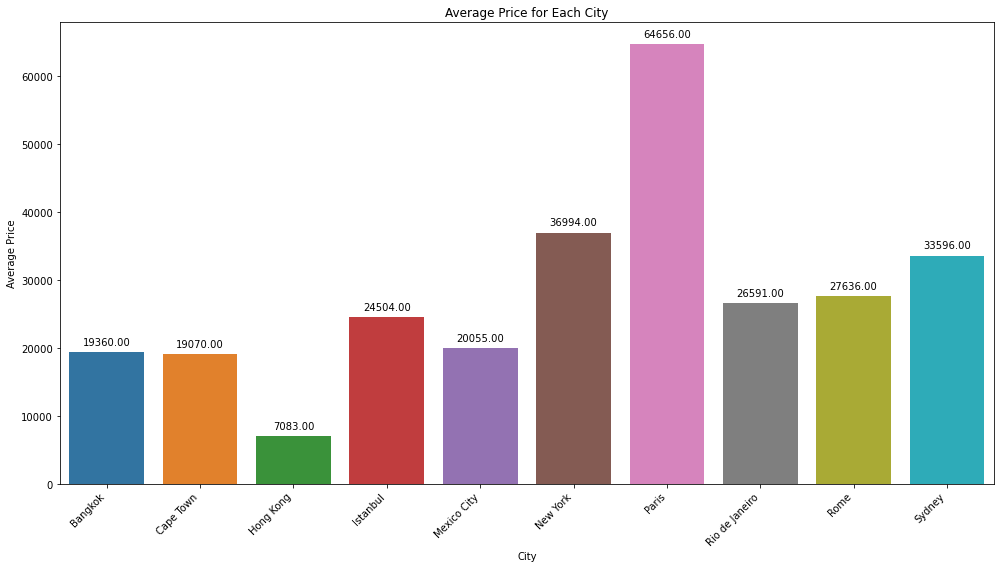

In [35]:
# Average Price by City

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='city', y='price', data=df.groupby('city').agg({'price': 'count'}).reset_index())

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Price for Each City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


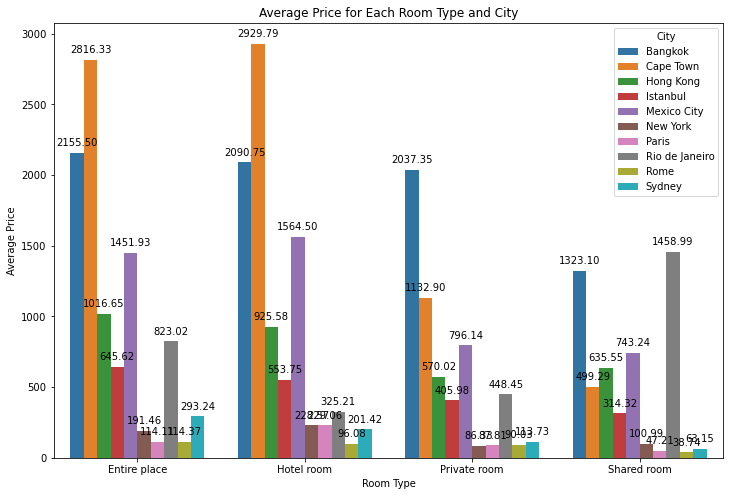

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
ax = sns.barplot(x='room_type', y='price', hue='city', data=df.groupby(['city','room_type']).agg({'price': 'mean'}).reset_index())

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Price for Each Room Type and City')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.legend(title='City')
plt.show()


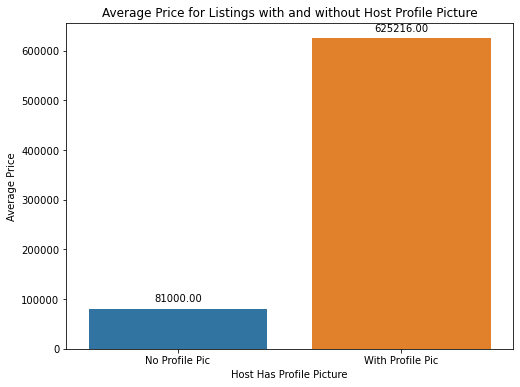

In [37]:
#Host has profile pic vs host does not 
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='host_has_profile_pic', y='price', data=df.groupby('host_has_profile_pic').agg({'price': 'max'}).reset_index())

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Price for Listings with and without Host Profile Picture')
plt.xlabel('Host Has Profile Picture')
plt.ylabel('Average Price')
plt.xticks([0, 1], ['No Profile Pic', 'With Profile Pic']) 
plt.show()

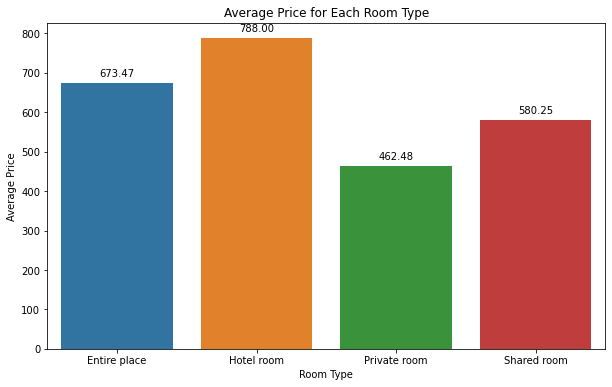

In [38]:
#Avg Price by Room Type

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='room_type', y='price', data=df.groupby('room_type').agg({'price': 'mean'}).reset_index())

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Price for Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

In [39]:
for col in list(df.columns):
    print(f'{col}----> {np.sort(df[col].unique())}')

host_response_time----> ['a few days or more' 'within a day' 'within a few hours' 'within an hour']
host_response_rate----> [0.         0.01       0.03       0.04       0.05       0.06
 0.07       0.08       0.09       0.1        0.11       0.12
 0.13       0.14       0.15       0.17       0.19       0.2
 0.21       0.22       0.23       0.24       0.25       0.27
 0.28       0.29       0.3        0.31       0.33       0.36
 0.38       0.39       0.4        0.41       0.42       0.43
 0.44       0.45       0.46       0.47       0.48       0.5
 0.51       0.52       0.53       0.54       0.55       0.56
 0.57       0.58       0.59       0.6        0.61       0.62
 0.63       0.64       0.65       0.67       0.68       0.69
 0.7        0.71       0.72       0.73       0.74       0.75
 0.76       0.77       0.78       0.79       0.8        0.81
 0.82       0.83       0.84       0.85       0.86       0.86593865
 0.87       0.88       0.89       0.9        0.91       0.92
 0.93       0.94  

In [40]:
df.isnull().sum().sort_values(ascending = False)

review_scores_value            91727
review_scores_location         91717
review_scores_checkin          91713
review_scores_accuracy         91655
review_scores_communication    91629
host_response_time                 0
host_response_rate                 0
hosting_since_days                 0
instant_bookable                   0
review_scores_cleanliness          0
review_scores_rating               0
maximum_nights                     0
minimum_nights                     0
price                              0
bedrooms                           0
accommodates                       0
room_type                          0
city                               0
host_identity_verified             0
host_has_profile_pic               0
host_total_listings_count          0
host_is_superhost                  0
host_acceptance_rate               0
amenities_count                    0
dtype: int64

In [41]:
review_cols = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 'review_scores_value']
for col in review_cols:
    df[col].fillna(1, inplace = True)
    print(f'{col} ----> {df[col].unique()}')

review_scores_accuracy ----> [10.  9.  8.  4.  7.  6.  5.  1.  2.  3.]
review_scores_cleanliness ----> [10.  9.  8.  7.  6.  4.  2.  5.  3.]
review_scores_checkin ----> [10.  9.  8.  7.  1.  6.  5.  2.  4.  3.]
review_scores_communication ----> [10.  9.  8.  7.  6.  1.  5.  2.  4.  3.]
review_scores_location ----> [10.  9.  8.  6.  7.  1.  2.  5.  4.  3.]
review_scores_value ----> [10.  9.  8.  6.  2.  7.  4.  1.  5.  3.]


In [42]:
print(df['price'].describe())
df['price'].quantile([0.25, 0.50, 0.75, 0.90, 0.99])

count    279545.000000
mean        608.627402
std        3440.073867
min           0.000000
25%          75.000000
50%         150.000000
75%         474.000000
max      625216.000000
Name: price, dtype: float64


0.25      75.0
0.50     150.0
0.75     474.0
0.90    1200.0
0.99    6500.0
Name: price, dtype: float64

In [43]:
# Removing outliers from the dataset
q3 = df['price'].quantile(0.75)
q1 = df['price'].quantile(0.25)
print(f'q3 = {q3}, q1 = {q1}')
iqr = q3 - q1
ul = q3 + (1.5*iqr)
df = df[df['price'] <= ul]
df['price'].describe()

q3 = 474.0, q1 = 75.0


count    248173.000000
mean        232.486600
std         241.407548
min           0.000000
25%          70.000000
50%         125.000000
75%         300.000000
max        1072.000000
Name: price, dtype: float64

count    248173.000000
mean        232.486600
std         241.407548
min           0.000000
25%          70.000000
50%         125.000000
75%         300.000000
max        1072.000000
Name: price, dtype: float64


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

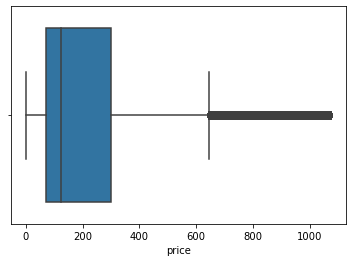

In [44]:
print(df['price'].describe())
sns.boxplot(df['price'])

0.25      1.0
0.50      1.0
0.75      4.0
0.90     14.0
0.99    279.0
Name: host_total_listings_count, dtype: float64


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_total_listings_count'>

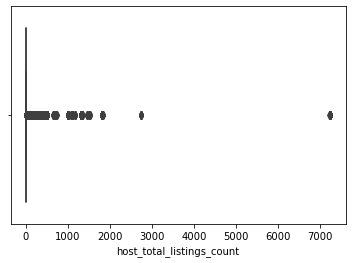

In [45]:
print(df['host_total_listings_count'].quantile([0.25, 0.50, 0.75, 0.90, 0.99]))
sns.boxplot(df['host_total_listings_count'])

In [46]:
df = df[df['host_total_listings_count'] <= 7]
df['host_total_listings_count'].describe()

count    210710.000000
mean          1.640957
std           1.521081
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           7.000000
Name: host_total_listings_count, dtype: float64

count    210710.000000
mean       2805.728575
std         894.209753
min        1019.000000
25%        2080.000000
50%        2875.000000
75%        3458.000000
max        5600.000000
Name: hosting_since_days, dtype: float64


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


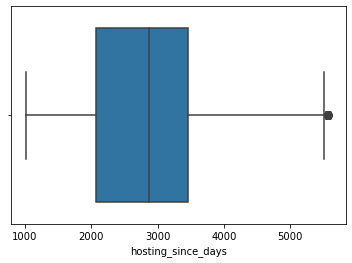

In [47]:
print(df['hosting_since_days'].describe())
sns.boxplot(df['hosting_since_days'])
plt.show()

count    2.107100e+05
mean     3.627844e+04
std      8.390999e+06
min      1.000000e+00
25%      3.000000e+01
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


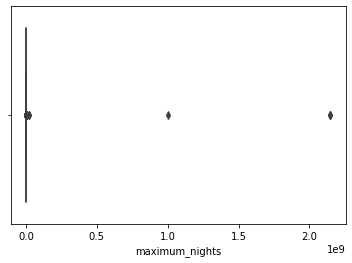

In [48]:
print(df['maximum_nights'].describe())
sns.boxplot(df['maximum_nights'])
plt.show()

In [49]:
q3 = df['maximum_nights'].quantile(0.75)
q1 = df['maximum_nights'].quantile(0.25)
iqr = q3 - q1
ul = q3 + 1.5*iqr
df = df[df['maximum_nights'] <= ul]
df['maximum_nights'].describe()

count    210665.000000
mean        662.626701
std         522.865972
min           1.000000
25%          30.000000
50%        1125.000000
75%        1125.000000
max        2000.000000
Name: maximum_nights, dtype: float64

In [50]:
q3 = df['minimum_nights'].quantile(0.75)
q1 = df['minimum_nights'].quantile(0.25)
iqr = q3 - q1
ul = q3 + 1.5*iqr
df = df[df['minimum_nights'] <= ul]
df['minimum_nights'].describe()

count    177995.000000
mean          2.543470
std           1.836975
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          11.000000
Name: minimum_nights, dtype: float64

In [51]:
ul

11.0

count    177995.000000
mean          2.543470
std           1.836975
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          11.000000
Name: minimum_nights, dtype: float64


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


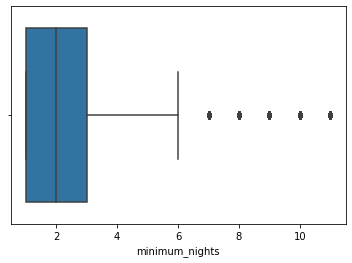

In [52]:
print(df['minimum_nights'].describe())
sns.boxplot(df['minimum_nights'])
plt.show()

In [53]:
for col in list(df.columns):
    print(f'{col}----> {np.sort(df[col].unique())}')

host_response_time----> ['a few days or more' 'within a day' 'within a few hours' 'within an hour']
host_response_rate----> [0.         0.01       0.03       0.04       0.05       0.06
 0.07       0.08       0.09       0.1        0.11       0.12
 0.13       0.14       0.15       0.17       0.2        0.22
 0.23       0.24       0.25       0.27       0.28       0.29
 0.3        0.31       0.33       0.36       0.38       0.39
 0.4        0.43       0.44       0.45       0.46       0.47
 0.48       0.5        0.51       0.52       0.53       0.54
 0.55       0.56       0.57       0.58       0.59       0.6
 0.61       0.62       0.63       0.64       0.65       0.67
 0.68       0.69       0.7        0.71       0.72       0.73
 0.74       0.75       0.76       0.77       0.78       0.79
 0.8        0.81       0.82       0.83       0.84       0.85
 0.86       0.86593865 0.87       0.88       0.89       0.9
 0.91       0.92       0.93       0.94       0.95       0.96
 0.97       0.98       0

In [54]:
cols = list(df.columns)
cat_cols = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'city', 'room_type', 'instant_bookable']
num_cols = [x for x in cols if x not in cat_cols]
num_cols.remove('price')

In [55]:
# Normalize each column using min-max scaler
def normalize(column):
    min = column.min()
    max = column.max()
    column = (column - min)/(max - min)
    return column

In [56]:
df_3=df.copy()

In [57]:
# Converting categorical columns into dummies
df_2 = pd.get_dummies(df,columns = cat_cols ,drop_first=True)
df_2.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,hosting_since_days,amenities_count,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Cape Town,city_Hong Kong,city_Istanbul,city_Mexico City,city_New York,city_Paris,city_Rio de Janeiro,city_Rome,city_Sydney,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,0.865939,0.827168,1.0,2,1.0,53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,4392.0,5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.865939,0.827168,1.0,2,1.0,120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3665.0,8,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.865939,0.827168,1.0,2,1.0,89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3421.0,6,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.865939,0.827168,1.0,2,1.0,58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3647.0,5,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.865939,0.827168,1.0,2,1.0,60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3285.0,12,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [58]:
df_2.shape

(177995, 36)

In [59]:
df_2.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'hosting_since_days',
       'amenities_count', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_t',
       'host_has_profile_pic_t', 'host_identity_verified_t', 'city_Cape Town',
       'city_Hong Kong', 'city_Istanbul', 'city_Mexico City', 'city_New York',
       'city_Paris', 'city_Rio de Janeiro', 'city_Rome', 'city_Sydney',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'instant_bookable_t'],
      dtype='object')

In [60]:
df=df_2.copy()

In [61]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'hosting_since_days',
       'amenities_count', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_t',
       'host_has_profile_pic_t', 'host_identity_verified_t', 'city_Cape Town',
       'city_Hong Kong', 'city_Istanbul', 'city_Mexico City', 'city_New York',
       'city_Paris', 'city_Rio de Janeiro', 'city_Rome', 'city_Sydney',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'instant_bookable_t'],
      dtype='object')

In [63]:
df.dtypes

host_response_rate                       float64
host_acceptance_rate                     float64
host_total_listings_count                float64
accommodates                               int64
bedrooms                                 float64
price                                      int64
minimum_nights                             int64
maximum_nights                             int64
review_scores_rating                     float64
review_scores_accuracy                   float64
review_scores_cleanliness                float64
review_scores_checkin                    float64
review_scores_communication              float64
review_scores_location                   float64
review_scores_value                      float64
hosting_since_days                       float64
amenities_count                            int64
host_response_time_within a day            uint8
host_response_time_within a few hours      uint8
host_response_time_within an hour          uint8
host_is_superhost_t 

In [64]:
df.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,hosting_since_days,amenities_count,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Cape Town,city_Hong Kong,city_Istanbul,city_Mexico City,city_New York,city_Paris,city_Rio de Janeiro,city_Rome,city_Sydney,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,0.865939,0.827168,1.0,2,1.0,53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,4392.0,5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.865939,0.827168,1.0,2,1.0,120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3665.0,8,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.865939,0.827168,1.0,2,1.0,89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3421.0,6,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.865939,0.827168,1.0,2,1.0,58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3647.0,5,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.865939,0.827168,1.0,2,1.0,60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3285.0,12,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
df[num_cols]

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,hosting_since_days,amenities_count
0,0.865939,0.827168,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,4392.0,5
1,0.865939,0.827168,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3665.0,8
2,0.865939,0.827168,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3421.0,6
3,0.865939,0.827168,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3647.0,5
4,0.865939,0.827168,1.0,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3285.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279705,0.865939,0.827168,1.0,2,1.0,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3165.0,12
279706,0.865939,0.827168,1.0,2,1.0,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3667.0,12
279707,0.865939,0.827168,1.0,2,1.0,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,4246.0,15
279708,0.865939,0.827168,1.0,2,1.0,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3071.0,15


In [66]:
df[num_cols] = df[num_cols].agg(normalize)
df.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,hosting_since_days,amenities_count,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Cape Town,city_Hong Kong,city_Istanbul,city_Mexico City,city_New York,city_Paris,city_Rio de Janeiro,city_Rome,city_Sydney,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,0.865939,0.827168,0.142857,0.125,0.0,53,0.090909,0.562,0.8,0.9,0.8,0.9,0.9,0.9,0.9,0.602321,0.044944,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.865939,0.827168,0.142857,0.125,0.0,120,0.090909,0.562,0.8,0.9,0.8,0.9,0.9,0.9,0.9,0.472500,0.078652,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.865939,0.827168,0.142857,0.125,0.0,89,0.090909,0.562,0.8,0.9,0.8,0.9,0.9,0.9,0.9,0.428929,0.056180,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.865939,0.827168,0.142857,0.125,0.0,58,0.090909,0.562,0.8,0.9,0.8,0.9,0.9,0.9,0.9,0.469286,0.044944,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.865939,0.827168,0.142857,0.125,0.0,60,0.090909,0.562,0.8,0.9,0.8,0.9,0.9,0.9,0.9,0.404643,0.123596,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
df_log=df.copy()

In [68]:
# Logarithmic transformation for the variable 'price'
non_zero_mask = df_log['price'] != 0

# Apply log transformation only to non-zero values
df_log.loc[non_zero_mask, 'price'] = np.log(df_log.loc[non_zero_mask, 'price'])

# XGBoost

In [69]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [70]:
X = df_log.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_log['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
xgb_model1 = xgb.XGBRegressor(random_state = 15)
model1 = xgb_model1.fit(X_train, y_train)

In [72]:
feature_importance_1 = {'Feature':X_train.columns,'Importance':model1.feature_importances_}
feature_importance_1 = pd.DataFrame(feature_importance_1)
feature_importance_1.sort_values("Importance", inplace=True,ascending=False)
feature_importance_1

,Feature,Importance
29,city_Rome,0.227013
27,city_Paris,0.165949
26,city_New York,0.155123
30,city_Sydney,0.121740
22,city_Cape Town,0.056689
28,city_Rio de Janeiro,0.045195
25,city_Mexico City,0.044784
4,bedrooms,0.032778
32,room_type_Private room,0.031114
24,city_Istanbul,0.027769


In [73]:
pred_train = model1.predict(X_train) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_train, pred_train)) 
print("RMSE : % f" %(rmse))

mse_train = MSE(y_train, pred_train)
print("MSE for Training Set: %f" % mse_train)

RMSE :  0.424103
MSE for Training Set: 0.179864


In [74]:
r2_train_xgboost = r2_score(y_train, model1.predict(X_train))
print("Training R-squared for XGBoost is:", r2_train_xgboost)

Training R-squared for XGBoost is: 0.8011493941190365


In [75]:
pred_test = model1.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_test)) 
print("RMSE : % f" %(rmse))

mse_test = MSE(y_test, pred_test)
print("MSE for Test Set: %f" % mse_test)

RMSE :  0.447144
MSE for Test Set: 0.199938


In [76]:
r2_test_xgboost = r2_score(y_test, model1.predict(X_test))
print("Test R-squared for XGBoost is:", r2_test_xgboost)

Training R-squared for XGBoost is: 0.777921476220355


In [77]:
#Creating a table for hyperparameter tuning in XGBoost

In [78]:
table = pd.DataFrame(columns = ["#Trees",  "LR", "Subsample", "% Features", "r2 Train", "r2 Test"])

table

,#Trees,LR,Subsample,% Features,r2 Train,r2 Test


In [79]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

# Create an empty DataFrame for the result table
columns = ["#Trees", "LR", "Subsample", "% Features", "r2 Train", "r2 Test", "MSE Test"]
table = pd.DataFrame(columns=columns)

# Initialize row index for the result table
row = 0

# Iterate through different numbers of trees
for numtrees in [300, 500]:
    # Iterate through different learning rates
    for LR in [0.01, 0.1, 0.3]:  
        # Iterate through different subsample ratios
        for Subsample in [0.5, 0.8]:
            # Iterate through different column subsample ratios
            for colsample_bytree in [0.5, 1]:
                # Create and train an XGBoost regressor model with the current hyperparameters
                xgb_instance = xgb.XGBRegressor(n_estimators=numtrees, 
                                                 learning_rate=LR, 
                                                 subsample=Subsample, 
                                                 colsample_bytree=colsample_bytree)
                model = xgb_instance.fit(X_train, y_train)

                # Update the result table with hyperparameter values and performance metrics
                table.loc[row, "#Trees"] = numtrees
                table.loc[row, "LR"] = LR
                table.loc[row, "Subsample"] = Subsample
                table.loc[row, "% Features"] = colsample_bytree
                
                table.loc[row, "r2 Train"] = r2_score(y_train, model.predict(X_train))
                table.loc[row, "r2 Test"] = r2_score(y_test, model.predict(X_test))
                
                # Calculate and add the Mean Squared Error on the test set
                pred_test = model.predict(X_test)
                mse_test = mean_squared_error(y_test, pred_test)
                table.loc[row, "MSE Test"] = mse_test
                
                # Move to the next row in the result table
                row += 1

# Sort the result table by "MSE Test" column
table_sorted = table.sort_values(by="MSE Test")

# Display the sorted result table
print(table_sorted)

   #Trees    LR Subsample % Features  r2 Train   r2 Test  MSE Test
19    500   0.1       0.8          1  0.819252  0.784854  0.193697
17    500   0.1       0.5          1  0.818762  0.783697  0.194738
7     300   0.1       0.8          1  0.804448  0.781314  0.196884
5     300   0.1       0.5          1  0.804474  0.781275  0.196919
18    500   0.1       0.8        0.5  0.812531  0.780668  0.197465
10    300   0.3       0.8        0.5  0.827631  0.779659  0.198373
22    500   0.3       0.8        0.5  0.847571  0.779365  0.198638
11    300   0.3       0.8          1  0.837121  0.779256  0.198737
16    500   0.1       0.5        0.5  0.810693  0.778848  0.199104
23    500   0.3       0.8          1  0.859139  0.777251  0.200542
9     300   0.3       0.5          1  0.832188  0.773619  0.203811
6     300   0.1       0.8        0.5  0.795781  0.773581  0.203846
8     300   0.3       0.5        0.5  0.822895  0.773208  0.204181
4     300   0.1       0.5        0.5   0.79375  0.771785  0.20

# Support Vector Regression (SVR)

In [80]:
from sklearn.svm import SVR

In [81]:
X = df_log.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_log['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
svm_model = SVR(kernel = 'rbf')
svm_model.fit(X_train, y_train)

SVR()

In [83]:
pred_train_svm = svm_model.predict(X_train)

In [84]:
r2_train_svr = r2_score(y_train, pred_train_svm)
print("Training R-squared for SVR is:", r2_train_svr)

Training R-squared for SVR is: 0.7660965805173825


In [85]:
pred_test = svm_model.predict(X_test)

In [87]:
r2_test_svr = r2_score(y_test, pred_test)
print("Test R-squared for SVR is:", r2_test_svr)

Test R-squared for SVR is: 0.759485937978098


In [88]:
from sklearn.metrics import mean_squared_error

mse_test_svr = mean_squared_error(y_test, pred_test)
print("Test MSE for SVR is:", mse_test_svr)

Test MSE for SVR is: 0.21653554041047987


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Scaling the features
scaler = StandardScaler()

# Standardizing the training dataset
X_train_scaled = scaler.fit_transform(X_train)
# Standardized the testing dataset
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Defining the parameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Creating an SVR model
svr = SVR()

# Creating the Grid Search object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the Grid Search object to the training data
grid_search.fit(X_train_scaled, y_train)

# Printing the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Predicting the airbnb listing price for the test set using the best model
y_pred = grid_search.predict(X_test_scaled)

# Calculating the mean squared error
mse_svr = mean_squared_error(y_test, y_pred)
print('Mean squared error of the SVR model: ', mse_svr)

# Calculating the mean absolute error
mae_svr = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of the SVR model: ', mae_svr)

# Computing the R-squared
r2_svr = r2_score(y_test, y_pred)
print('R-squared of the SVR model is:', r2_svr)

In [ ]:
# Unable to complete running SVR with GridSearch & CV as kernel was stuck

# Linear Regression

In [89]:
X = df_log.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_log['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Add a constant (intercept) term to the training data
X_train = sm.add_constant(X_train)

# Create an OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train)  
results = model.fit()  # Fit the model

X_test = sm.add_constant(X_test)  
y_pred = results.predict(X_test)  # Predict using the test data

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get a summary of the regression model
summary = results.summary()
print(summary)

Mean Squared Error: 0.2777113959732036
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     9448.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:42:31   Log-Likelihood:            -1.0929e+05
No. Observations:              142396   AIC:                         2.187e+05
Df Residuals:                  142360   BIC:                         2.190e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Polynomial Regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = df_log.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_log['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Define the polynomial degree values for the grid search
poly_grid = {'polynomialfeatures__degree': [1]}

# Create instances of PolynomialFeatures and LinearRegression
poly = PolynomialFeatures()
poly_reg = LinearRegression()

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_pipeline = make_pipeline(poly, poly_reg)

# Set up GridSearchCV with the specified parameters
poly_reg_grid = GridSearchCV(poly_pipeline, poly_grid, cv=5)

In [91]:
poly_reg_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1]})

In [92]:
poly_reg_grid.predict(x_test)

array([5.78176343, 6.1855031 , 4.62989623, ..., 4.40982732, 4.54067267,
       5.8869818 ])

In [93]:
poly_reg_grid.score(x_test, y_test) 

0.6948644810685164

In [94]:
poly_reg_grid.best_params_ 

{'polynomialfeatures__degree': 1}

In [95]:
poly_reg_grid.best_score_

0.6984305672892209

In [96]:
poly_reg_grid.cv_results_['mean_test_score']

array([0.69843057])

In [97]:
np.max(poly_reg_grid.cv_results_['mean_test_score'])

0.6984305672892209

In [98]:
poly_reg_grid.best_estimator_.named_steps['linearregression'].coef_

array([ 5.61699359e-17, -2.60667246e-01,  5.70769905e-03,  9.04906265e-02,
        1.83044427e+00,  3.16239271e+00,  3.82159619e-02,  5.86443833e-02,
        3.86526478e-01, -3.38486019e-02,  4.03238137e-01, -1.38233938e-01,
       -2.27515942e-01,  8.91781757e-01, -6.87278997e-01,  2.50537021e-01,
        4.37620855e-01,  2.75461279e-01,  2.65251910e-01,  2.91742470e-01,
       -1.04647802e-02, -1.68651094e-02, -3.73705142e-02, -2.40580137e-01,
       -4.75294587e-01, -1.19312418e+00, -3.52645274e-01, -2.03947593e+00,
       -2.34764451e+00, -1.31084610e+00, -2.58099322e+00, -1.88337866e+00,
        8.97122425e-02, -3.73418806e-01, -7.74792725e-01,  4.94803312e-04])

In [99]:
poly_reg_grid.best_estimator_.named_steps['linearregression'].intercept_

5.759604127975906

In [100]:
# Calculate Mean Squared Error on the test set
y_pred = poly_reg_grid.predict(x_test)
mse_poly_reg = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_poly_reg)

Mean Squared Error: 0.2747144343029899


# Ridge Regression

In [101]:
# Data Loading and Splitting
X = df_log.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_log['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [102]:
from sklearn.linear_model import Ridge
ridge_base = Ridge(alpha = 1)
ridge_base.fit(x_train, y_train)

Ridge(alpha=1)

In [103]:
y_test_pred = ridge_base.predict(x_test)

MSE_test = np.mean((y_test - y_test_pred)**2)
MSE_test

0.2747018089713932

In [104]:
## Grid Search with CV
from sklearn.model_selection import GridSearchCV
# Define a list of parameters (key is 'alpha')
param_grid = {  'alpha' : [0.001, 0.01, 0.1, 1, 10,100]  }
#Define function and fit the data
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv = 5)
grid_ridge.fit(x_train, y_train)

# performance measure
print(grid_ridge.score(x_test, y_test))
# mean validation score of best model
print(grid_ridge.best_score_)

# find best hyperparameters
print(grid_ridge.best_params_)

# find best parameter estimates
print(grid_ridge.best_estimator_.coef_)
print(grid_ridge.best_estimator_.intercept_)

# Calculate Mean Squared Error on the test set
y_pred = grid_ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_ridge)

0.694878504492942
0.6984539920211887
{'alpha': 1}
[-2.59605719e-01  5.69766800e-03  9.04365957e-02  1.83790753e+00
  3.07420359e+00  3.86004781e-02  5.87120880e-02  3.85334459e-01
 -3.40780575e-02  4.02889111e-01 -1.37773440e-01 -2.26699945e-01
  8.87635207e-01 -6.84279248e-01  2.50200126e-01  4.37464340e-01
  2.74593405e-01  2.64252988e-01  2.90704057e-01 -1.05175407e-02
 -1.67190991e-02 -3.74730318e-02 -2.36301404e-01 -4.70917418e-01
 -1.18883504e+00 -3.48335837e-01 -2.03510596e+00 -2.34346022e+00
 -1.30668869e+00 -2.57678271e+00 -1.87877960e+00  8.98813868e-02
 -3.73278310e-01 -7.74502604e-01  5.19766364e-04]
5.755914722747395
Mean Squared Error: 0.27470180897139446


# Lasso Regression

In [105]:
# Model and prediction with default hyperparameter
from sklearn.linear_model import Lasso

lasso_base = Lasso(alpha = 1)
lasso_base.fit(x_train, y_train)

lasso_base.score(x_test, y_test)

-8.878203412443497e-07

In [107]:
# Grid Search with CV - LASSO Case


# Define a list of parameters (key is 'alpha')
param_grid = {  'alpha' :  [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }
# Define function and fit the data
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid, cv = 5)
grid_lasso.fit(x_train, y_train)
# performance measure
print(grid_lasso.score(x_test, y_test))
## mean validation score of best model
print(grid_lasso.best_score_)
# find best hyperparameters
print(grid_lasso.best_params_)
# find best parameter estimates
print(grid_lasso.best_estimator_.coef_)
print(grid_lasso.best_estimator_.intercept_)

# Calculate Mean Squared Error on the test set
y_pred = grid_lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_lasso)

0.6948710603083472
0.6984356840582268
{'alpha': 1e-05}
[-2.55939758e-01  5.51194193e-03  9.02992078e-02  1.83306860e+00
  3.12838104e+00  3.79827606e-02  5.85683387e-02  3.83662865e-01
 -3.21692204e-02  4.02642495e-01 -1.36833097e-01 -2.25894504e-01
  8.83921229e-01 -6.84153082e-01  2.49861967e-01  4.36015297e-01
  2.71338716e-01  2.60650266e-01  2.87388450e-01 -1.04144716e-02
 -1.40799748e-02 -3.73592007e-02 -2.36582980e-01 -4.70736676e-01
 -1.18926684e+00 -3.48736434e-01 -2.03554957e+00 -2.34372041e+00
 -1.30696714e+00 -2.57713080e+00 -1.87925736e+00  8.93410291e-02
 -3.73356856e-01 -7.74060697e-01  4.86780610e-04]
5.756196923365707
Mean Squared Error: 0.274708510993391


# K-Nearest Neighbors Regression

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Data Loading and Splitting
X = df_log.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_log['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Grid Search with CV - kNN Case

# Define a list of parameters
param_grid = {
    'n_neighbors' : [5, 10, 15, 50],
    # 'algorithm' :  ['kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
}
# Define function and fit the data
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(knn, param_grid, cv = 5)


grid_knn.fit(x_train, y_train)
grid_knn.predict(x_test)

array([5.64512765, 6.52861157, 4.42337624, ..., 4.33063176, 4.19645389,
       5.99524168])

In [109]:
grid_knn.score(x_test, y_test)
## mean validation score of best model
print(grid_knn.best_score_)
# find best hyperparameters
print(grid_knn.best_params_)

0.7228747941362366
{'n_neighbors': 15, 'weights': 'distance'}


In [110]:
# Calculate Mean Squared Error on the test set
y_pred = grid_knn.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_knn)

Mean Squared Error: 0.24602458304425542


# Decision Tree Regression

In [112]:
from sklearn.preprocessing import LabelEncoder

# Assuming cat_cols is a list of categorical column names
label_encoder = LabelEncoder()

for col in cat_cols:
    df_3[col] = label_encoder.fit_transform(df_3[col])

# drop the original categorical columns
df_3.drop(columns=cat_cols, inplace=True)

df_3.head()

non_zero_mask = df_3['price'] != 0

# Apply log transformation only to non-zero values
df_3.loc[non_zero_mask, 'price'] = np.log(df_3.loc[non_zero_mask, 'price'])

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Data Loading and Splitting
X = df_3.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_3['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Grid Search with CV - dtree Case

# Define a list of parameters
param_grid = {
    'max_depth': [None, 5, 10, 15],  # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Define function and fit the data
dtree = DecisionTreeRegressor()
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5)


grid_dtree.fit(x_train, y_train)
grid_dtree.predict(x_test)

array([5.66203615, 5.03686503, 4.97037619, ..., 4.42288137, 4.69690849,
       4.96644353])

In [114]:
grid_dtree.score(x_test, y_test)
## mean validation score of best model
print(grid_dtree.best_score_)
# find best hyperparameters
print(grid_dtree.best_params_)

0.17927999907748218
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [115]:
# Calculate Mean Squared Error on the test set
y_pred = grid_dtree.predict(x_test)
mse_dtree = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_dtree)

Mean Squared Error: 0.7330661814429991


# Random Forest Regression

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Data Loading and Splitting
X = df_3.copy()
X.drop(['price'],inplace = True, axis =1)
y = df_3['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Grid Search with CV - dtree Case

# Define a list of parameters
param_grid = {
    # 'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Define function and fit the data
randf = DecisionTreeRegressor()
grid_randf = GridSearchCV(randf, param_grid, cv = 5)


grid_randf.fit(x_train, y_train)
grid_randf.predict(x_test)

array([5.66203615, 5.03686503, 4.97037619, ..., 4.42288137, 4.69690849,
       4.96644353])

In [117]:
grid_randf.score(x_test, y_test)
## mean validation score of best model
print(grid_randf.best_score_)
# find best hyperparameters
print(grid_randf.best_params_)

0.1792827834622468
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [118]:
# Calculate Mean Squared Error on the test set
y_pred = grid_randf.predict(x_test)
mse_randf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_randf)

Mean Squared Error: 0.7331879614305254
